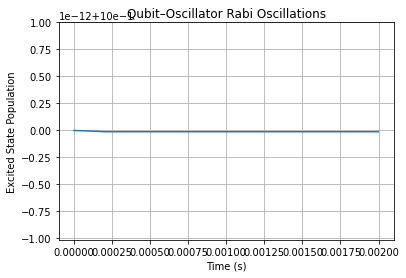

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import expm


hbar = 1.054e-34
omega_m = 2*np.pi*1e5       # mechanical frequency
Omega_q = 2*np.pi*1e5        # qubit frequency
g = 2*np.pi*200              # coupling strength (Hz)

N = 5  # oscillator Hilbert space dimension


# Bosonic operators
a = np.zeros((N, N))
for n in range(1, N):
    a[n-1, n] = np.sqrt(n)
adag = a.T

# Qubit Pauli matrices
sigma_z = np.array([[1, 0], [0, -1]])
sigma_p = np.array([[0, 1], [0, 0]])
sigma_m = sigma_p.T

# Tensor product helper
def kron(a, b):
    return np.kron(a, b)


# Hamiltonian

H = (hbar * omega_m) * kron(np.eye(2), adag @ a) \
    + (hbar * Omega_q / 2) * kron(sigma_z, np.eye(N)) \
    + (hbar * g) * (kron(sigma_p, a) + kron(sigma_m, adag))


# Time evolution

dt = 1e-6
steps = 2000

# Start with: qubit excited |1>, oscillator ground |0>
psi = np.zeros(2*N, dtype=complex)
psi[N] = 1.0

pop = []

for _ in range(steps):
    U = expm(-1j * H * dt / hbar)
    psi = U @ psi
    # Probability qubit in excited state
    excited = np.sum(np.abs(psi[N:2*N])**2)
    pop.append(excited)

# Plot
plt.plot(np.arange(steps)*dt, pop)
plt.xlabel("Time (s)")
plt.ylabel("Excited State Population")
plt.title("Qubit–Oscillator Rabi Oscillations")
plt.grid(True)
plt.show()
